## Visualización de imágenes

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage.transform import rotate

from skimage.color import label2rgb
import cv2

from skimage import feature
from skimage.color import rgb2gray
from skimage import io
import numpy as np
import glob
#import zip

from pyClass import FeatureExtraction

In [102]:
def comparar_histogramas_lbp(female_path, male_path, num_points = 8, ratio=1, method='nri_uniform'):
    ## Cargar imagenes
    female = rgb2gray(io.imread(female_path))
    male = rgb2gray(io.imread(male_path))
    
    ## Histogramas lbp
    lbp = FeatureExtraction.LocalBinaryPattern(num_points, ratio, method)
    female_hist = lbp.describe(female)
    male_hist = lbp.describe(male)

    # Plotear imagenes
    plt.subplot(221)
    plt.imshow(female)
    plt.title("Rostro mujer")

    plt.subplot(222)
    plt.hist(female_hist, bins=female_hist.shape[0])
    plt.title("Histograma LBP mujer")

    plt.subplot(223)
    plt.imshow(male)
    plt.title("Rostro hombre")

    plt.subplot(224)
    plt.hist(male_hist, male_hist.shape[0])
    plt.title("Histograma LBP hombre")

    plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 
    plt.show()

## 1. Visualización del dataset  disponible

In [56]:
ruta_female = "./DataInput/Female/"
ruta_male = "./DataInput/Male/"

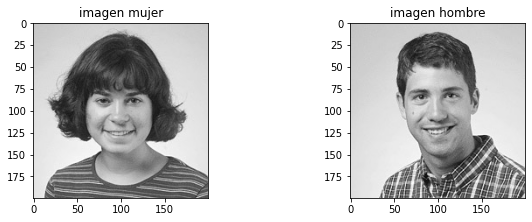

In [57]:
lista_female = os.listdir(ruta_female)
lista_male = os.listdir(ruta_male)

i=9
female = cv2.imread(ruta_female+lista_female[i], cv2.IMREAD_COLOR)
male = cv2.imread(ruta_male+lista_male[i], cv2.IMREAD_COLOR)

plt.subplot(221)
plt.imshow(female)
plt.title("imagen mujer")

plt.subplot(222)
plt.imshow(male)
plt.title("imagen hombre")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

In [58]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces_detected_female = face_cascade.detectMultiScale(female, scaleFactor=1.1, minNeighbors=3)
(x, y, w, h) = faces_detected_female[0] 
faces_detected_male = face_cascade.detectMultiScale(male, scaleFactor=1.1, minNeighbors=3)
(x2, y2, w2, h2) = faces_detected_male[0]
p=0

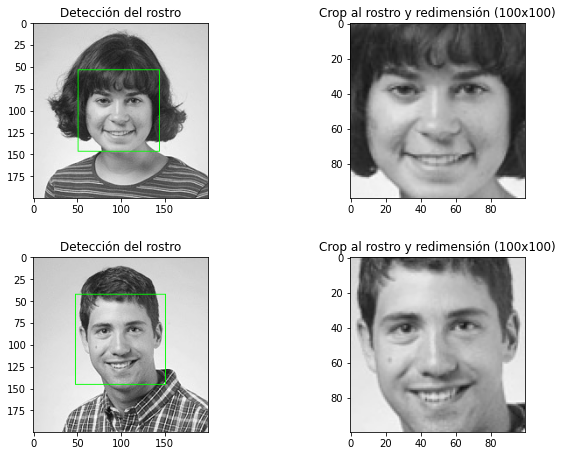

In [59]:
female_aux = female.copy()
cv2.rectangle(female_aux, (x, y), (x + w, y + h), (0, 255, 0), 1);
female_crop = female_aux[y-p+1:y+h+p, x-p+1:x+w+p]
female_crop = cv2.resize(female_crop, (100,100), interpolation = cv2.INTER_AREA)

male_aux = male.copy()
cv2.rectangle(male_aux, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 1);
male_crop = male_aux[y2-p+1:y2+h2+p, x2-p+1:x2+w2+p]
male_crop = cv2.resize(male_crop, (100,100), interpolation = cv2.INTER_AREA)

plt.subplot(221)
plt.imshow(female_aux)
plt.title("Detección del rostro")

plt.subplot(222)
plt.imshow(female_crop)
plt.title("Crop al rostro y redimensión (100x100)")

plt.subplot(223)
plt.imshow(male_aux)
plt.title("Detección del rostro")

plt.subplot(224)
plt.imshow(male_crop)
plt.title("Crop al rostro y redimensión (100x100)")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

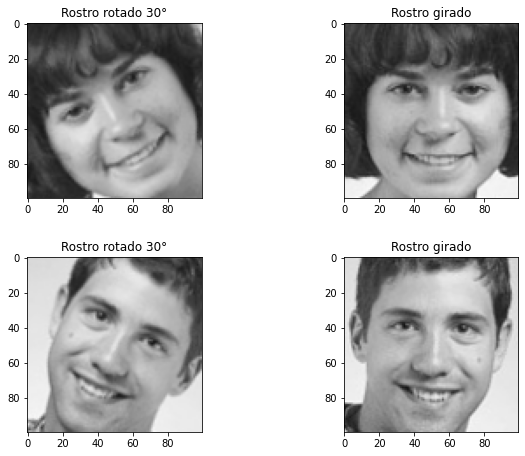

In [60]:
rows, cols = female.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
female_rotated = cv2.warpAffine(female, M, (cols,rows))
female_rotated = female_rotated[y-p+1:y+h+p, x-p+1:x+w+p]
female_rotated = cv2.resize(female_rotated, (100,100), interpolation = cv2.INTER_AREA)

rows, cols = male.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), -30, 1)
male_rotated = cv2.warpAffine(male, M, (cols,rows))
male_rotated = male_rotated[y2-p+1:y2+h2+p, x2-p+1:x2+w2+p]
male_rotated = cv2.resize(male_rotated, (100,100), interpolation = cv2.INTER_AREA)

female_flip = cv2.flip(female, 1)
female_flip = female_flip[y-p+1:y+h+p, x-p+1:x+w+p]
female_flip = cv2.resize(female_flip, (100,100), interpolation = cv2.INTER_AREA)

male_flip = cv2.flip(male, 1)
male_flip = male_flip[y2-p+1:y2+h2+p, x2-p+1:x2+w2+p]
male_flip = cv2.resize(male_flip, (100,100), interpolation = cv2.INTER_AREA)

plt.subplot(221)
plt.imshow(female_rotated)
plt.title("Rostro rotado 30°")

plt.subplot(222)
plt.imshow(female_flip)
plt.title("Rostro girado")

plt.subplot(223)
plt.imshow(male_rotated)
plt.title("Rostro rotado 30°")

plt.subplot(224)
plt.imshow(male_flip)
plt.title("Rostro girado")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 


## 2. Visualización de las features

In [73]:
ruta_female = "./GenderDataProcessed/Train/Female/"
ruta_male = "./GenderDataProcessed/Train/Male/"

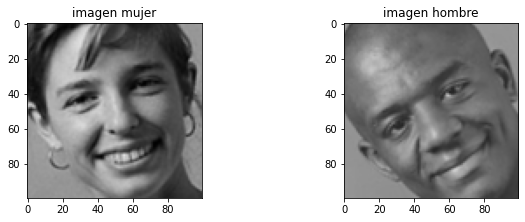

In [74]:
lista_female = os.listdir(ruta_female)
lista_male = os.listdir(ruta_male)

i = 10
female = cv2.imread(ruta_female+lista_female[i], cv2.IMREAD_COLOR)
male = cv2.imread(ruta_male+lista_male[i], cv2.IMREAD_COLOR)

plt.subplot(221)
plt.imshow(female)
plt.title("imagen mujer")

plt.subplot(222)
plt.imshow(male)
plt.title("imagen hombre")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

In [75]:
### LBP
ratio = 1
num_points = 8*ratio
method = 'nri_uniform'

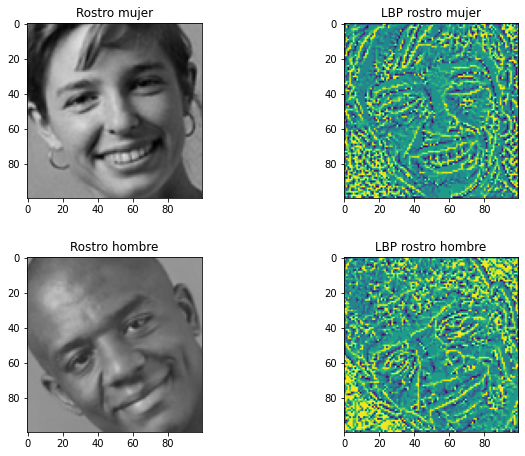

In [77]:
female2 = rgb2gray(io.imread(ruta_female+lista_female[i]))
lbp_female = feature.local_binary_pattern(female2, num_points, ratio, method=method)

male2 = rgb2gray(io.imread(ruta_male+lista_male[i]))
lbp_male = feature.local_binary_pattern(male2, num_points, ratio, method=method)

plt.subplot(221)
plt.imshow(female)
plt.title("Rostro mujer")

plt.subplot(222)
plt.imshow(lbp_female)
plt.title("LBP rostro mujer")

plt.subplot(223)
plt.imshow(male)
plt.title("Rostro hombre")

plt.subplot(224)
plt.imshow(lbp_male)
plt.title("LBP rostro hombre")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

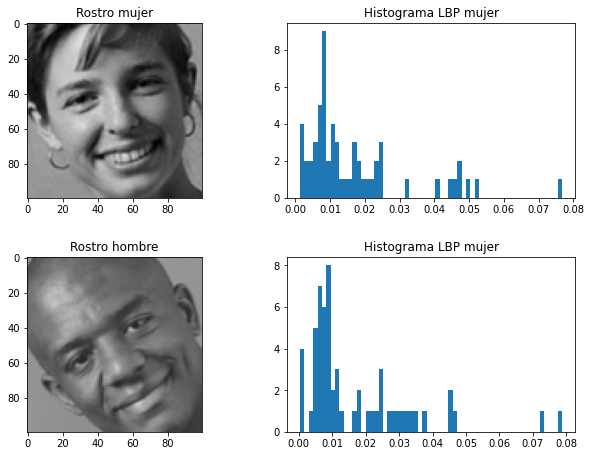

In [86]:
eps=1e-7

unique = np.unique(lbp_female.ravel())
(hist_female, _) = np.histogram(lbp_female.ravel(), bins=np.arange(0, unique[-1]+2), range=(0, unique[-1]+1))
hist_female = hist_female.astype("float")
hist_female /= (hist_female.sum() + eps)

unique = np.unique(lbp_male.ravel())
(hist_male, _) = np.histogram(lbp_male.ravel(), bins=np.arange(0, unique[-1]+2), range=(0, unique[-1]+1))
hist_male = hist_male.astype("float")
hist_male /= (hist_male.sum() + eps)

plt.subplot(221)
plt.imshow(female)
plt.title("Rostro mujer")

plt.subplot(222)
plt.hist(hist_female, bins=int(unique[-1]+2))
plt.title("Histograma LBP mujer")

plt.subplot(223)
plt.imshow(male)
plt.title("Rostro hombre")

plt.subplot(224)
plt.hist(hist_male, bins=int(unique[-1]+2))
plt.title("Histograma LBP mujer")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

## Imágenes LBP uniform

In [88]:
### LBP
ratio = 1
num_points = 8*ratio
method = 'uniform'

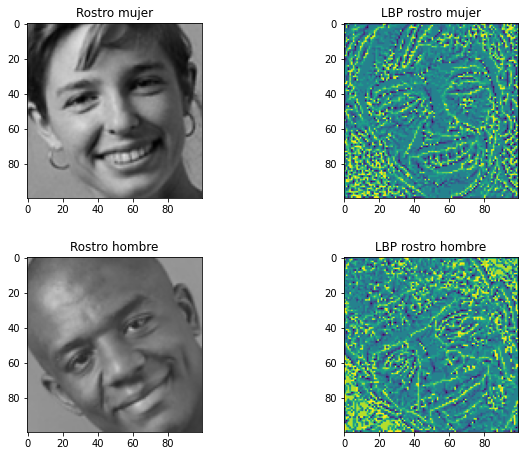

In [89]:
female2 = rgb2gray(io.imread(ruta_female+lista_female[i]))
lbp_female = feature.local_binary_pattern(female2, num_points, ratio, method=method)

male2 = rgb2gray(io.imread(ruta_male+lista_male[i]))
lbp_male = feature.local_binary_pattern(male2, num_points, ratio, method=method)

plt.subplot(221)
plt.imshow(female)
plt.title("Rostro mujer")

plt.subplot(222)
plt.imshow(lbp_female)
plt.title("LBP rostro mujer")

plt.subplot(223)
plt.imshow(male)
plt.title("Rostro hombre")

plt.subplot(224)
plt.imshow(lbp_male)
plt.title("LBP rostro hombre")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

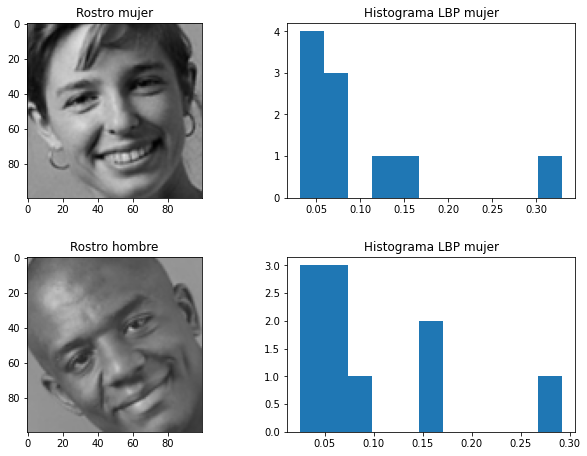

In [90]:
eps=1e-7

unique = np.unique(lbp_female.ravel())
(hist_female, _) = np.histogram(lbp_female.ravel(), bins=np.arange(0, unique[-1]+2), range=(0, unique[-1]+1))
hist_female = hist_female.astype("float")
hist_female /= (hist_female.sum() + eps)

unique = np.unique(lbp_male.ravel())
(hist_male, _) = np.histogram(lbp_male.ravel(), bins=np.arange(0, unique[-1]+2), range=(0, unique[-1]+1))
hist_male = hist_male.astype("float")
hist_male /= (hist_male.sum() + eps)

plt.subplot(221)
plt.imshow(female)
plt.title("Rostro mujer")

plt.subplot(222)
plt.hist(hist_female, bins=int(unique[-1]+2))
plt.title("Histograma LBP mujer")

plt.subplot(223)
plt.imshow(male)
plt.title("Rostro hombre")

plt.subplot(224)
plt.hist(hist_male, bins=int(unique[-1]+2))
plt.title("Histograma LBP mujer")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 

### Comparación histogramas 

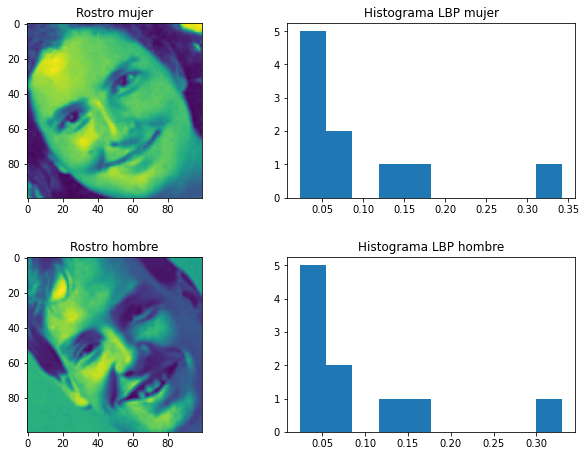

In [105]:
ruta_female = "./GenderDataProcessed/Train/Female/"
ruta_male = "./GenderDataProcessed/Train/Male/"

lista_female = os.listdir(ruta_female)
lista_male = os.listdir(ruta_male)

i = 50
female_path = ruta_female+lista_female[i]
male_path = ruta_male+lista_male[i]

comparar_histogramas_lbp(female_path, male_path, num_points = 8, ratio=1, method='uniform')

### Dividir imagen en 4

In [ ]:
x, y = female.shape
plt.imshow(female)
img1 = female[0:int(x/2), 0:int(y/2)]
img2 = female[0:int(x/2), int(y/2):y]
img3 = female[int(x/2):x, 0:int(y/2)]
img4 = female[int(x/2):x, int(y/2):y]

plt.subplot(221)
plt.imshow(img1)
plt.title("Rostro1")

plt.subplot(222)
plt.imshow(img2)
plt.title("Rostro2")

plt.subplot(223)
plt.imshow(img3)
plt.title("Rostro3")

plt.subplot(224)
plt.imshow(img4)
plt.title("Rostro4")

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=0.34,
                    wspace=0.1) 